In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from pandas import DataFrame
import numpy as np

In [2]:
%matplotlib inline

In [3]:


seq='ATCGTCAGTCGATCGATCGCATCATGA'
## seq (my own addition) is a sequence for testing string-translate function
filename = "penguins_cytb.fasta"
##sets input file as variable to use in code
def get_sequences_from_file(filename):
    ##define function of your own creation
    sequence_data_dict = {}
    ##create empty dictionary
    for record in SeqIO.parse(filename, "fasta"):
    ##reads the FASTA records line by line    
        description = record.description.split()
        ##splits by gaps
        species_name = description[1] + " " + description[2]
        ##parses first two words and adds them together to get species name
        sequence_data_dict[species_name] = record.seq
        ##populates dictionary with all records in the file
    return(sequence_data_dict)
    ##returns the dictionary

In [4]:
##create penguins.library
from Bio import SeqIO
fasta_fn = "penguins_cytb.fasta"
(get_sequences_from_file(fasta_fn))
penguin_library = (get_sequences_from_file(fasta_fn))

In [5]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)

In [16]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
from Bio.Data import CodonTable

mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

def do_translate(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    amino_acid = ""
    for i in range(0, len(string_nucleotides)-3, 3):
        codon = string_nucleotides[i:i+3]
        aa = mito_table.forward_table[codon]
        amino_acid += aa
    return  amino_acid

do_translate(seq)

'IVSRSIAS'

In [7]:
from Bio.Seq import Seq
from Bio.Seq import translate
from Bio.Alphabet import IUPAC
for key, value in penguin_library.items():
    aa_string = value.translate(to_stop=True)
    print(aa_string)

MAPNLRKSHPLLKIINNSLIDLPTPSNISA
MAPNLRKSHPLLKIINNSLIDLPTPSNISA
MAPNLRKSHPLLKTINNSLIDLPTPSNISA
MAPNLRKSHPLLKTINNSLIDLPTPSNISA
MAPNLRKSHPLLKTINNSLIDLPTPSNISA
MAPNLRKSHPLLKIINNSLIDLPTPSNIST
MAPNLRKSHPLLKIINNSLIDLPTPSNISA
MAPNLRKSHPLLKIINNSLIDLPTPSNISA
MAPNLRKSHPLLKIINKSLIDLPTPPNISA
MAPNLRKSHPLLKTINNSLIDLPTPSNISA
MAPNLRKSHPLLKTINNSLIDLPTPSNISA
MAPNLRKSHPLLKTINNSLIDLPTPSNISA


In [8]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio import SeqIO
from Bio.Alphabet import IUPAC
from Bio.SeqUtils import GC
for key, value in penguin_library.items():
    protein = value.translate(to_stop=True)
    protein_string = str(protein)
    analysed_seq = ProteinAnalysis(protein_string)
    seq_weight = analysed_seq.molecular_weight()
    string_weight=str(seq_weight)
    print("Molecular weight of "+key+" protein: "+string_weight)

Molecular weight of Aptenodytes forsteri protein: 3268.8268000000007
Molecular weight of Aptenodytes patagonicus protein: 3268.8268000000007
Molecular weight of Eudyptes chrysocome protein: 3256.7731000000013
Molecular weight of Eudyptes chrysolophus protein: 3256.7731000000013
Molecular weight of Eudyptes sclateri protein: 3256.7731000000013
Molecular weight of Eudyptula minor protein: 3298.8528000000015
Molecular weight of Pygoscelis adeliae protein: 3268.8268000000007
Molecular weight of Pygoscelis antarctica protein: 3268.8268000000007
Molecular weight of Pygoscelis papua protein: 3292.934400000001
Molecular weight of Spheniscus demersus protein: 3256.7731000000013
Molecular weight of Spheniscus humboldti protein: 3256.7731000000013
Molecular weight of Spheniscus magellanicus protein: 3256.7731000000013


In [9]:
for key, values in penguin_library.items():
    GC_content = GC(value)
    GC_string = str(GC_content)
    print ("GC content of " + key + "sequence is " + GC_string + "%\n")

GC content of Aptenodytes forsterisequence is 48.20647419072616%

GC content of Aptenodytes patagonicussequence is 48.20647419072616%

GC content of Eudyptes chrysocomesequence is 48.20647419072616%

GC content of Eudyptes chrysolophussequence is 48.20647419072616%

GC content of Eudyptes sclaterisequence is 48.20647419072616%

GC content of Eudyptula minorsequence is 48.20647419072616%

GC content of Pygoscelis adeliaesequence is 48.20647419072616%

GC content of Pygoscelis antarcticasequence is 48.20647419072616%

GC content of Pygoscelis papuasequence is 48.20647419072616%

GC content of Spheniscus demersussequence is 48.20647419072616%

GC content of Spheniscus humboldtisequence is 48.20647419072616%

GC content of Spheniscus magellanicussequence is 48.20647419072616%



In [10]:
import pandas as pd
import numpy as np
penguins_df1 = penguins_df.copy()
penguins_df1['molecular_weight']= np.nan
penguins_df1['GC_content']= np.nan

In [11]:
## 7 ##

molecular_weight_list = []
GC_content_list = []
for key, value in penguin_library.items():
    aa_seq = value.translate(to_stop=True)
    protein_string = str(aa_seq)
    analysed_seq = ProteinAnalysis(protein_string)
    string_weight = str(analysed_seq.molecular_weight())
    molecular_weight_list.append(string_weight)
    GC_content = GC(value)
    GC_string = str(GC_content)
    GC_content_list.append(GC_content)
    
molecular_weight_array = np.asarray(molecular_weight_list)
penguins_df1["molecular_weight"] = pd.Series(molecular_weight_array)
GC_content_array = np.asarray(GC_content_list)
penguins_df1["GC_content"]= pd.Series(GC_content_array)
penguins_df1


,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,3268.8268000000007,48.381452
1,Aptenodytes patagonicus,13.40,3268.8268000000007,49.693788
2,Eudyptes chrysocome,2.80,3256.7731000000013,51.181102
3,Eudyptes chrysolophus,4.50,3256.7731000000013,50.918635
4,Eudyptes sclateri,4.25,3256.7731000000013,50.831146
5,Eudyptula minor,1.60,3298.8528000000015,49.256343
6,Pygoscelis adeliae,4.60,3268.8268000000007,49.081365
7,Pygoscelis antarctica,4.10,3268.8268000000007,47.769029
8,Pygoscelis papua,6.10,3292.934400000001,47.156605
9,Spheniscus demersus,3.20,3256.7731000000013,48.293963


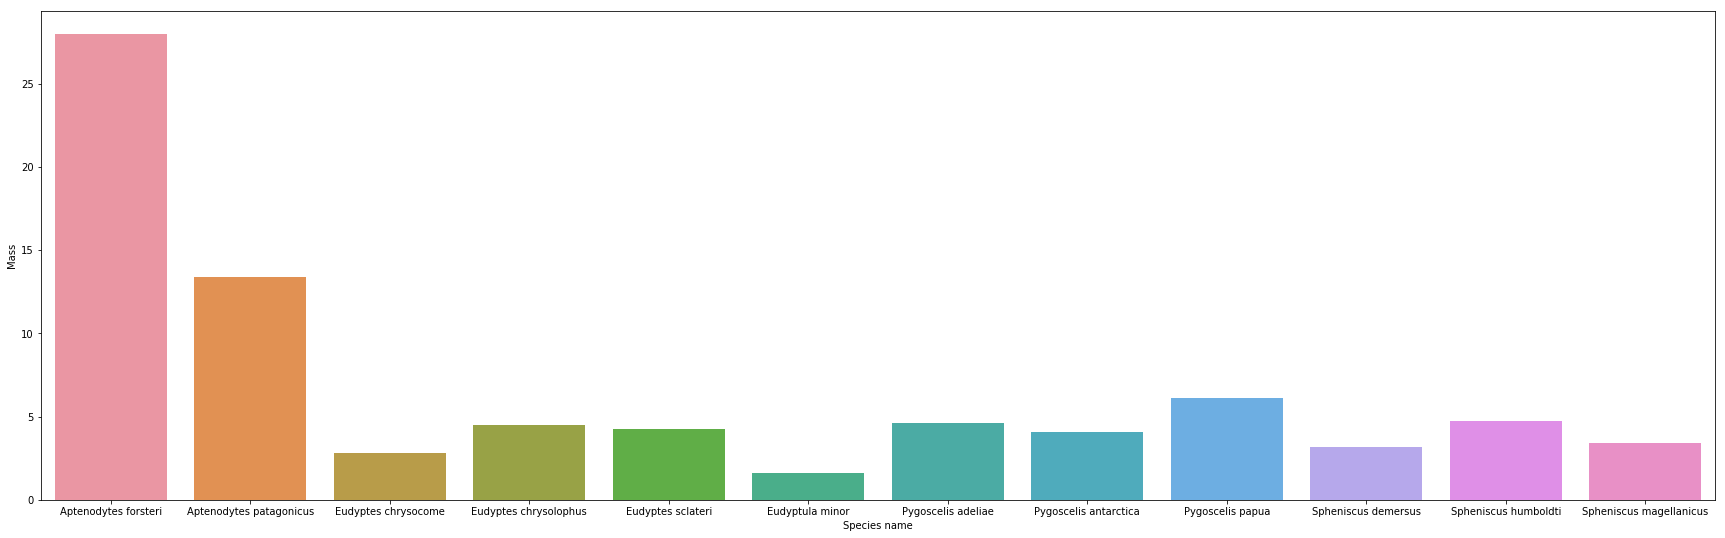

In [12]:
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## Eudyptula minor
## *Q2* What else is interesting about this species?
## It's the only species in its genus? They're from NZ/Aus? Gonna need more of an idea of what you're looking for with this question...
import matplotlib.pyplot as plt
import seaborn as sns
#as in class
plot_dims=(30,9)
#Create barchart using matplotlib and seaborn
fig, ax = plt.subplots(figsize=plot_dims)
#set x variable as species and y variable as mass
sns.barplot(x = 'species', y = 'mass', data=penguins_df)
#set labels of chart
ax.set(xlabel='Species name', ylabel='Mass')


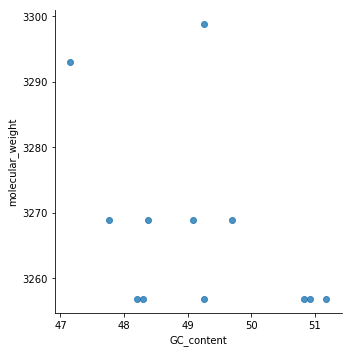

In [13]:
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
import matplotlib.pyplot as plt
import seaborn as sns
penguins_df2 = penguins_df1.apply(pd.to_numeric, errors='coerce')
sns.lmplot("GC_content", "molecular_weight", data=penguins_df2, fit_reg=False)

In [14]:
penguins_df2.to_csv('penguins_mass_cytb.csv')